In [2]:
import pandas as pd
import numpy as np
import math as math
from matplotlib import pyplot as plt
from IPython.display import display, Math, HTML
import scipy.optimize as op
from pylab import *
!pip install tabulate colorama

**Ecuaciones de NRTL**
\begin{equation}
\ln\gamma_{1}=x_{2}^{2}[\tau_{21}(\frac{G_{21}}{x_{1}+x_{2}G_{21}})^{2}+\frac{G_{12}\tau_{12}}{(x_{2}+x_{1}G_{12})^{2}}]
\end{equation}

\begin{equation}
\ln\gamma_{2}=x_{1}^{2}[\tau_{12}(\frac{G_{12}}{x_{2}+x_{1}G_{12}})^{2}+\frac{G_{21}\tau_{21}}{(x_{1}+x_{2}G_{21})^{2}}]
\end{equation}

\begin{equation}
G_{12}=\exp(-\alpha\tau_{12})
\end{equation}

\begin{equation}
G_{21}=\exp(-\alpha\tau_{21})
\end{equation}

\begin{equation}
\tau_{12}=\frac{b_{12}}{RT}
\end{equation}

\begin{equation}
\tau_{21}=\frac{b_{21}}{RT}
\end{equation}


Tabla de composiciones con colores:
+----+-------+-------+-----------+------------+---------+---------+------------+------------+---------+│
|    |   X_1 |   X_2 |       Y_1 |        Y_2 |   Act_1 |   Act_2 |   P1(mmHg) |   P2(mmHg) |    T(K) |│
+====+=======+=======+===========+============+=========+=========+============+============+=========+│
|  0 |  0.01 |  0.99 | 0.0741308 | 0.925869   | 2.24844 | 1.00008 |    56.3394 |  703.661   | 371.287 |│
+----+-------+-------+-----------+------------+---------+---------+------------+------------+---------+│
|  1 |  0.02 |  0.98 | 0.137589  | 0.862411   | 2.20195 | 1.00032 |   104.568  |  655.432   | 369.61  |│
+----+-------+-------+-----------+------------+---------+---------+------------+------------+---------+│
|  2 |  0.03 |  0.97 | 0.192538  | 0.807462   | 2.15803 | 1.00072 |   146.329  |  613.671   | 368.088 |│
+----+-------+-------+-----------+------------+---------+---------+------------+------------+---------+│
|  3 |  0.04 |  0.9

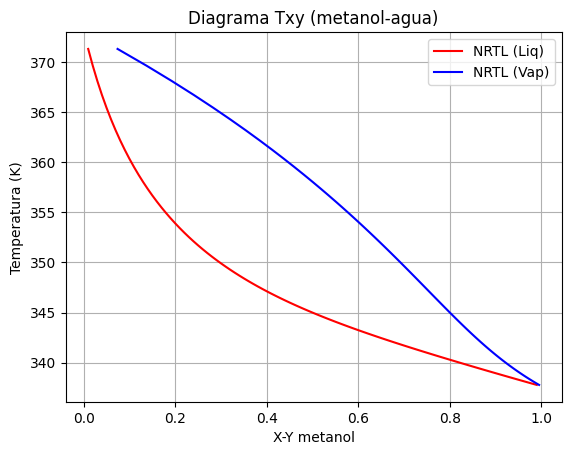

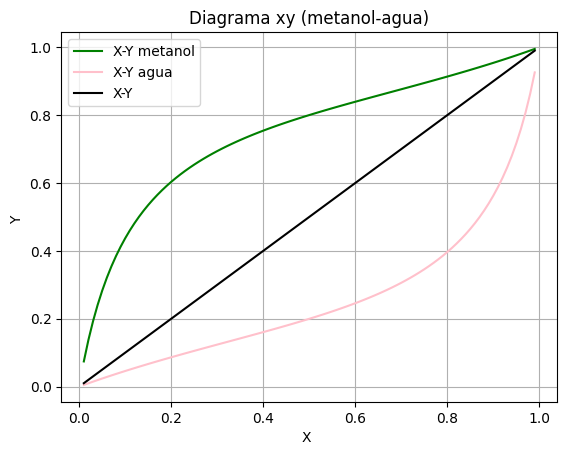

99


In [3]:
from math import exp,log,fabs
import pandas as pd
from tabulate import tabulate
from colorama import Fore, Style
import matplotlib.pyplot as plt

def Tauij(aij,bij,T):
  return aij+(bij/T)

def Gij(cij,tij):
  return exp(-cij*tij)

def actividad1(tau12,tau21,G12,G21,x1,x2):
  return exp((x2**2)*(tau21*(G21/(x1+x2*G21))**2+(tau12*G12/((x2+x1*G12)**2))))

def actividad2(tau12,tau21,G12,G21,x1,x2):
  return exp((x1**2)*(tau12*(G12/(x2+x1*G12))**2+(tau21*G21/((x1+x2*G21)**2))))

def Antoine(A,B,C,T): #Ecuación de Antoine
  return 10**(A-(B/(T+C)))
def g(p0,p1,fx1,fx0):
  return p1-(fx1*(p1-p0))/(fx1-fx0)

a12=-0.693
b12=173.0
c12=0.3
a21=2.732
b21=-617.3
c21=0
p0=328.15 #K
p1=330.15
C_metanol=[8.0724,1574.99,238.87]
C_agua=[8.07131,1730.63,233.426]




x1=[]
for i in range(99):
  x1.append(0.01*(i+1))
x2=[]
act1=[]
act2=[]
y1=[]
y2=[]
T1=[]
TRaoult=[]
yRaoult=[]
Pp1=[]
Pp2=[]
n=len(x1)

ntot=len(x1)

for i in range(n):
  x2.append(1-x1[i])
P=760 #mmHg

az=[]
ALFA=[]
Tz=[]
TOL=0.0000001
M=1000
for i in range(n):
  for j in range(M):
    Taui12x=Tauij(a12,b12,p0)
    Taui21x=Tauij(a21,b21,p0)
    G12x=Gij(c12,Taui12x)
    G21x=Gij(c21,Taui21x)
    Pv_metanolx=Antoine(C_metanol[0],C_metanol[1],C_metanol[2],p0-273.15)
    Pv_aguax=Antoine(C_agua[0],C_agua[1],C_agua[2],p0-273.15)
    gamma1x=actividad1(Taui12x,Taui21x,G12x,G21x,x1[i],x2[i])
    gamma2x=actividad2(Taui12x,Taui21x,G12x,G21x,x1[i],x2[i])
    P1x=gamma1x*x1[i]*Pv_metanolx
    P2x=gamma2x*x2[i]*Pv_aguax
    Pptx=P1x+P2x-P

    Taui12y=Tauij(a12,b12,p1)
    Taui21y=Tauij(a21,b21,p1)
    G12y=Gij(c12,Taui12y)
    G21y=Gij(c21,Taui21y)
    Pv_metanoly=Antoine(C_metanol[0],C_metanol[1],C_metanol[2],p1-273.15)
    Pv_aguay=Antoine(C_agua[0],C_agua[1],C_agua[2],p1-273.15)
    gamma1y=actividad1(Taui12y,Taui21y,G12y,G21y,x1[i],x2[i])
    gamma2y=actividad2(Taui12y,Taui21y,G12y,G21y,x1[i],x2[i])
    P1y=gamma1y*x1[i]*Pv_metanoly
    P2y=gamma2y*x2[i]*Pv_aguay
    Ppty=P1y+P2y-P
    p=g(p0,p1,Ppty,Pptx)
    if fabs(p-p1)<TOL:
      break
    else:
      p0=p1
      p1=p


  T1.append(p0)
  act1.append(actividad1(Taui12y,Taui21y,G12y,G21y,x1[i],x2[i]))
  act2.append(actividad2(Taui12y,Taui21y,G12y,G21y,x1[i],x2[i]))
  Pp1.append(act1[i]*x1[i]*Pv_metanoly)
  Pp2.append(act2[i]*x2[i]*Pv_aguay)
  y1.append(act1[i]*x1[i]*Pv_metanoly/P)
  y2.append(act2[i]*x2[i]*Pv_aguay/P)
  K1=y1[i]/x1[i]
  K2=y2[i]/x2[i]
  ALFA.append(K1/K2)
  if fabs(y1[i]-x1[i])<0.005:
    az.append(x1[i])
    Tz.append(T1[i])
  else:
    continue




data = {
  "X_1": x1,
  "X_2": x2,
  "Y_1": y1,
  "Y_2": y2,
  "Act_1":act1,
  "Act_2":act2,
  "P1(mmHg)":Pp1,
  "P2(mmHg)":Pp2,
  "T(K)":T1


}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'



print("Tabla de composiciones con colores:")
print(colored_table)



plt.plot(x1,T1, color='red', label='NRTL (Liq)')
plt.plot(y1,T1, color='blue', label='NRTL (Vap)')


plt.xlabel('X-Y metanol')
plt.ylabel('Temperatura (K)')
plt.title('Diagrama Txy (metanol-agua)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x1,y1, color='green', label='X-Y metanol')
plt.plot(x2,y2, color='pink', label='X-Y agua')
plt.plot(x1,x1,color='black',label='X-Y')


plt.xlabel('X ')
plt.ylabel('Y ')
plt.title('Diagrama xy (metanol-agua)')
plt.legend()
plt.grid(True)
plt.show()

alfa_coefx=np.polyfit(x1,ALFA,10) #Se ajustan los puntos por medio de un ajuste polinómico
alfa_coefy=np.polyfit(y1,ALFA,10)


#alfa_polix=np.polyval(alfa_coefx,x)
#alfa_poliy=np.polyval(alfa_coefy,y)


# DATOS DE EQUILIBRIO----------------------------------------------
x=np.arange(0,1.01,0.01)
alfa_x=np.polyval(alfa_coefx,x)
y=(alfa_x*x)/(1+x*(alfa_x-1))

print(ntot)

Se desea separar una mezcla de metanol-agua con alimentación 1 de 520.833 kg mol/h y alimentación 2 de 313.715 kg mol/h:
* *Fracción en alimentación 1*: 0.36
* *Fracción en alimentación 2*: 0.194
* *Pureza destilado*: 0.931
* *Pureza fondos*: 0.023
* *Razón de reflujo*: 2.5

De acuerdo a los resultados del Método NRTL, la temperatura de burbuja de la mezcla es de 74.98°C en la corriente 1 y la temperatura de rocío 94.93 °C en la corriente 2.

La alimentación entra a condiciones de:
* *Alimentación 1*:Líquido saturado
* *Alimentación 2*: Vapor saturado




# **MÉTODO MCCABE-THIELE**
## **2 CORRIENTES**

La razón de ebullición es: 0.9785
Flujo del destilado: 252.385447 kmol/h
Flujo residual: 582.162553 kmol/h
Flujo de vapor (Fondo): 569.634065 kmol/h
Flujo de líquido (Domo): 630.963618 kmol/h
Flujo de vapor (Domo): 883.349065 kmol/h
Número de etapas: 6
Plato de alimentación 1: 4
Plato de alimentación 2: 5


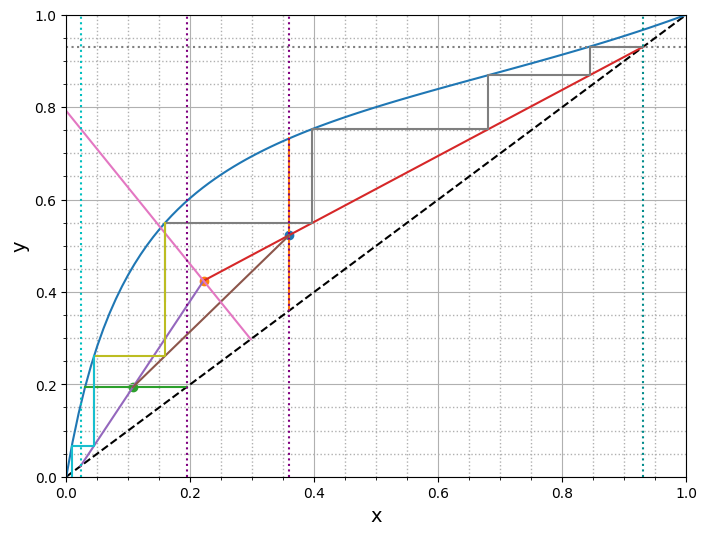

In [43]:
comp1='metanol'
comp2='agua'
# metanol , agua
C1 = [5.2053e+7, 5.0451e+7]
C2 = [0.3199, 0.33594]
C3 = [-0.212, 0]
C4 = [0.25795, 0]
Tc = [512.6, 647.1]         # Temperatura crítica en K
pm = [32.042 , 18.015]       # Peso molecular
T = [74.985+273.15,94.938+273.15]  # Temperatura del sistema en K

tF=[74.985,94.938]    #°C


tburbuja = [74.985,94.938]

z1=0.36 #Fracción de alimentación
z2=0.194
F1=520.833   # kmol/h
F2=313.715
R=2.5 #Razón de reflujo
xD=0.931 #Pureza del destilado
xB=0.023 #Pureza de los fondos
zmezcla=((F1*z1)+(F2*z2))/(F1+F2) #Cálculo de la composición de la alimentación si fuera solo 1
#BALANCE DE MATERIA
B = (F1*(z1-xD)+F2*(z2-xD))/(xB-xD)   # fondos
D = F1+F2-B                       # destilado

n = len(C1)

CL = []

for j in range(n):
  for i in range (n):
      Tr = T[j]/Tc[i]
      Hv= C1[i]*(1-Tr)**(C2[i] + C3[i]*Tr + C4[i]*Tr**2)
      CL1 = Hv/4184
      CL.append(CL1)


CL_prom1 = (z1*CL[0]) + ((1-z1)*CL[1])
CL_prom2 = (z2*CL[2]) + ((1-z2)*CL[3])


PMF1 = 100 / ((z1*100/pm[0])+(1-z1)*100/pm[1]) #Cálculo del peso molecular promedio de la mezcla
PMF2 = 100 / ((z2*100/pm[0])+(1-z2)*100/pm[1]) #Cálculo del peso molecular promedio de la mezcla

Lmda1 = CL_prom1/PMF1  # Calor latente de vaporización de la alimentación (cal/g)
Lmda2 = CL_prom2/PMF2


def cp_aguaL(T): # cal/g°C
  cof=[0.0754,0,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[1]*0.0042) #Polinomios Cp del componente 2
  return (cp)
def cp_metanolL(T):
  cof=[0.07586,1.683e-4,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[0]*0.0042) #Polinomios Cp del componente 1
  return (cp)


def cp_aguaV(T): # cal/g°C
  cof=[0.03346,6.88e-6,7.604e-9,-3.593e-12]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[1]*0.0042) #Polinomios Cp del componente 2
  return (cp)
def cp_metanolV(T):
  cof=[0.04293,8.301e-5,-1.87e-8,-8.03e-12]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[0]*0.0042) #Polinomios Cp del componente 1
  return (cp)

cpL1 = cp_metanolL(T[0])
cpL2 = cp_aguaL(T[0])
cptotal1 = (cpL1+cpL2)/2 #Se obtiene el Cp de la mezcla al promediar el Cp de los componentes puros

cpV1 = cp_metanolV(T[1])
cpV2 = cp_aguaV(T[1])
cptotal2 = (cpV1+cpV2)/2 #Se obtiene el Cp de la mezcla al promediar el Cp de los componentes puros


q1 = 1 + ((cptotal1*(tburbuja[0]-tF[0]))/Lmda1) #Cálculo de q para una alimentación fría (no saturada)


q2 = -((cptotal2*(tF[1]-tburbuja[1]))/Lmda2) #Cálculo de q para una alimentación de vapor


q=[q1,q2]
z=[z1,z2]
x_P=[]
y_P=[]


# CÁLCULO DE PUNTO PINCH
#línea de referencia
for o in range(n):
  if q[o]==1.0:   #Líquido saturado
      xP=z[o]
      alfa=np.polyval(alfa_coefx,xP)
      yP=(alfa*xP)/(1+xP*(alfa-1))


  if q[o]==0.0:   #Vapor saturado
      yP=z[o]
      alfa=np.polyval(alfa_coefy,yP)
      xP=yP/(alfa-(yP*(alfa-1)))
  #-----------------------------------
  else:
      i=1
      xit=0
      tol=0.00005
      e=1
      while e>tol:
          alfa=np.polyval(alfa_coefx,xit)
          xP=((alfa-1)*(z[o]+q[o])-alfa+(((alfa-1)*(z[o]+q[o])-alfa)**2+(4*z[o]*(alfa-1)*q[o]))**0.5)/(2*(alfa-1)*q[o])
          yP=(alfa*xP)/(1+xP*(alfa-1))
          alfa1=np.polyval(alfa_coefx,xP)
          e=abs(alfa1-alfa)
          xit=xP
          i=i+1
  x_P.append(xP)
  y_P.append(yP)


xpinch1=[z[0],x_P[0]]
ypinch1=[z[0],y_P[0]]

xpinch2=[z[1],x_P[1]]
ypinch2=[z[1],y_P[1]]
  #----------------------------------------

xint1=(z[0]*(R+1)+xD*(q[0]-1))/(q[0]*(R+1)-R*(q[0]-1)) #Cálculo del punto de intersección
yint1=(R*xint1/(R+1))+(xD/(R+1)) #Cálculo de la coordenada y de intersección a partir de la línea de operación de rectificación
ms1=(xD-yint1)/(xD-xint1)


ms2=((q[0]*F1)+(q[1]*F2))/(((q[0]-1)*F1)+((q[1]-1)*F2))

xint2=(zmezcla-ms2*zmezcla-(xD/(R+1)))/(ms1-ms2) #Cálculo de la intersección de la línea de rectificación y la línea de alimentación de mezcla
yint2=(ms2*(xint2-zmezcla))+zmezcla
ms3=((yint2-xB)/(xint2-xB))

ms4=(ypinch2[1]-z[1])/(xpinch2[1]-z[1])
xint3=(ms3*xB-xB-ms4*z[1]+z[1])/(ms3-ms4) #Cálculo de la intersección de la línea de agotamiento y la línea de alimentación 2
yint3=(ms3*(xint3-xB))+xB

ms5=(yint1-yint3)/(xint1-xint3)
xinter=np.linspace(xint3,xint1,50) #Gráfica de la línea de operación entre alimentaciones
yinter=(ms5)*(xinter-xint3)+yint3

xguia=np.linspace(0,zmezcla,50)
yguia=(ms2*(xguia-zmezcla))+zmezcla

xag=np.linspace(xB,xint2,50) #Gráfica de la línea de agotamiento
yag=(ms3*(xag-xB))+xB

xrec=np.linspace(xint2,xD,50) #Cálculo de la línea de operación de la zona de rectificación
yrec=(ms1*xrec)+(xD/(R+1))


xr=xD
yr=xD
XR=np.array([xr])
YR=np.array([yr])
i=0

while yr>yint1: #Se pone de condición el punto de intersección donde debe frenarse este ciclo
    alfa=np.polyval(alfa_coefy,yr)
    xr=yr/(alfa-yr*(alfa-1)) #Se calcula el número de platos evaluando el punto de intersección del ajuste de datos de equilibrio en "x"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)
    yr=(ms1*xr)+(xD/(R+1)) #Se evalúa el punto de intersección con la línea de operación de rectificación para encontrar "y"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)

    i=i+1
    #xr=XR[i]
    #yr=YR[i]

p_alim1=i #Se pone un contador del número de platos para determinar el plato de alimentación
xm=XR[-2]
ym=YR[-2]
XM=np.array([xm])
YM=np.array([ym])




while ym>yint3: #Se pone de condición para frenar el ciclo, que el cálculo se haga entre el punto de intersección 1 y 2
    ym=(ms5)*(xm-xint3)+yint3 #Se empieza calculando "y" al evaluar la línea de operación de intermedia
    XM=np.append(XM,xm)
    YM=np.append(YM,ym)
    if ym<yint3:
        break
    alfa=np.polyval(alfa_coefy,ym) #Posterior a ello, se evalúa el ajuste de datos de equilibrio para encontrar "x"
    xm=ym/(alfa-ym*(alfa-1))
    XM=np.append(XM,xm)
    YM=np.append(YM,ym)
    i=i+1 #Se contínua contando en  no. de platos hasta finalizar el ciclo


p_alim2=i #Se pone un contador del número de platos para determinar el plato de alimentación
xa=XM[-2]
ya=YM[-2]
XA=np.array([xa])
YA=np.array([ya])



S=(xint3-xB)/(yint3-xint3) #Cálculo de la razón S

while ya>xB: #Se pone de condición para frenar el ciclo, que el cálculo se haga entre el punto de intersección y la fracción de componente en los fondos
    ya=(ms3*xa)-(xB/S) #Se empieza calculando "y" al evaluar la línea de operación de agotamiento
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    if ya<xB:
        break
    alfa=np.polyval(alfa_coefy,ya) #Posterior a ello, se evalúa el ajuste de datos de equilibrio para encontrar "x"
    xa=ya/(alfa-ya*(alfa-1))
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    i=i+1 #Se contínua contando en  no. de platos hasta finalizar el ciclo

print("La razón de ebullición es: %.4f"%S)


V=S*B #V: Vapor, #S: Razón de recirculación Reboiler, #B: Flujo de fondos
L=R*D #L: Líquido #R: Razón de reflujo condensador  #D: Flujo de destilado
V1=L+D #V1: Razón de vapor en la parte superior de la torre

print('Flujo del destilado: %f kmol/h' %D)
print('Flujo residual: %f kmol/h' %B)
print('Flujo de vapor (Fondo): %f kmol/h' %V)
print('Flujo de líquido (Domo): %f kmol/h' %L)
print('Flujo de vapor (Domo): %f kmol/h'%V1)

plt.figure(1,figsize=(8,6))
plt.plot(x,x,'k--')
plt.plot(x,y)
plt.plot(xpinch1,ypinch1)
plt.plot(xpinch2,ypinch2)
plt.scatter(xint1,yint1)
plt.scatter(xint2,yint2)
plt.scatter(xint3,yint3)


plt.plot(xrec,yrec)
plt.plot(xag,yag)
plt.plot(xinter,yinter)
plt.plot(xguia,yguia)
plt.plot(XR,YR)
plt.plot(XM,YM)
plt.plot(XA,YA)

axhline(xD, color='gray', ls="dotted", label = 'YD')
axvline(xD, color='darkcyan', ls="dotted", label = 'XD')
axvline(xpinch1[0], color='purple', ls="dotted", label = 'XF1')
axvline(xpinch2[0], color='purple', ls="dotted", label = 'XF2')
axvline(xB, color='c', ls="dotted", label = 'XR')

#plt.title('Determinación de platos teóricos mezcla %s - %s ' %(comp1,comp2))
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.minorticks_on()
plt.grid( which='minor',linestyle='dotted', linewidth=1)
plt.grid(which='major')
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('torre1.png')


print('Número de etapas: %i' %i)
print('Plato de alimentación 1: %i' %p_alim1)
print('Plato de alimentación 2: %i' %p_alim2 )